In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import calendar
from scipy.stats import norm

# Data Loading

In [2]:
crime_data = pd.read_csv('/Users/archie/Downloads/Crimes_-_2001_to_Present.csv')

# Data Exploration

In [3]:
crime_data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11037294,JA371270,03/18/2015 12:00:00 PM,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,...,42.0,32.0,11,NaN,NaN,2015,08/01/2017 03:52:26 PM,NaN,NaN,NaN
1,11646293,JC213749,12/20/2018 03:00:00 PM,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,36.0,19.0,11,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,11645959,JC211511,12/20/2018 04:00:00 PM,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,...,33.0,14.0,08A,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
4,11645601,JC212935,06/01/2014 12:01:00 AM,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,21.0,71.0,11,NaN,NaN,2014,04/06/2019 04:04:43 PM,NaN,NaN,NaN


In [4]:
crime_data.shape

(7984276, 22)

In [5]:
crime_data.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [6]:
# Printing Columns of the Dataframe
crime_data.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [7]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7984276 entries, 0 to 7984275
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

# Data Cleaning

In [8]:
# checking the missing values in crime dataframe
crime_data.isna().sum()

ID                           0
Case Number                  0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     12399
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614854
Community Area          613479
FBI Code                     0
X Coordinate             87921
Y Coordinate             87921
Year                         0
Updated On                   0
Latitude                 87921
Longitude                87921
Location                 87921
dtype: int64

In [9]:
# functions to drop/dropna columns
def drop_columns(df,columns_to_drop):
    return df.drop(columns=columns_to_drop,inplace=True)

def dropna_columns(df,columns_to_dropna):
    return df.dropna(subset=columns_to_drop,inplace=True)

In [10]:
columns_to_dropna = ['Location Description', 'District', 'Community Area', 'Latitude', 'Longitude']
crime_data.dropna(subset=columns_to_dropna, inplace=True)

In [11]:
columns_to_drop = ['Block','IUCR','Beat','Ward','FBI Code','X Coordinate', 'Y Coordinate' , 'Updated On' ,'Location']
drop_columns(crime_data,columns_to_drop)

In [12]:
crime_data.isna().sum().sort_values(ascending=False)

ID                      0
Case Number             0
Date                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
District                0
Community Area          0
Year                    0
Latitude                0
Longitude               0
dtype: int64

In [89]:
crime_data = crime_data.drop_duplicates()

In [91]:
crime_data.head()

,ID,Case Number,Date,Primary Type,Description,Location Description,Arrest,Domestic,District,Community Area,Year,Latitude,Longitude,Month,Week,Day,Month Name
0,12045583,JD226426,2020-05-07,THEFT,$500 AND UNDER,APARTMENT,0,0,2,35,2020,41.830482,-87.621752,5,3,5,May
1,12031001,JD209965,2020-04-16,BATTERY,SIMPLE,APARTMENT,1,0,9,60,2020,41.836310,-87.639624,4,3,5,April
2,12093529,JD282112,2020-07-01,ASSAULT,AGGRAVATED - HANDGUN,STREET,1,0,4,46,2020,41.747610,-87.549179,7,2,4,July
3,12178140,JD381597,2020-09-27,BATTERY,SIMPLE,RESIDENCE - PORCH / HALLWAY,0,0,7,67,2020,41.774878,-87.671375,9,6,1,September
4,4144897,HL474854,2005-07-10,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,0,0,7,68,2005,41.781003,-87.652107,7,6,1,July


In [92]:
crime_data.shape

(7245932, 17)

In [14]:
crime_data['Date'] = pd.to_datetime(crime_data['Date'].str.split(" ").str[0], format='%m/%d/%Y')

In [15]:
crime_data['Month'] = crime_data['Date'].dt.month

In [16]:
crime_data['Week'] = crime_data['Date'].dt.dayofweek

In [17]:
crime_data['Day'] = crime_data['Date'].dt.dayofweek + 1

In [18]:
# Adjust the numbering to match your requirement (1 for Sunday, 2 for Monday, ..., 7 for Saturday)
crime_data['Day'] = crime_data['Day'] % 7 + 1

In [19]:
crime_data.reset_index(drop=True, inplace=True)

In [20]:
crime_data.head()

,ID,Case Number,Date,Primary Type,Description,Location Description,Arrest,Domestic,District,Community Area,Year,Latitude,Longitude,Month,Week,Day
0,12045583,JD226426,2020-05-07,THEFT,$500 AND UNDER,APARTMENT,False,False,2.0,35.0,2020,41.830482,-87.621752,5,3,5
1,12031001,JD209965,2020-04-16,BATTERY,SIMPLE,APARTMENT,True,False,9.0,60.0,2020,41.836310,-87.639624,4,3,5
2,12093529,JD282112,2020-07-01,ASSAULT,AGGRAVATED - HANDGUN,STREET,True,False,4.0,46.0,2020,41.747610,-87.549179,7,2,4
3,12178140,JD381597,2020-09-27,BATTERY,SIMPLE,RESIDENCE - PORCH / HALLWAY,False,False,7.0,67.0,2020,41.774878,-87.671375,9,6,1
4,4144897,HL474854,2005-07-10,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,7.0,68.0,2005,41.781003,-87.652107,7,6,1


In [21]:
# Reclassify certain crime types into broader categories
crime_data.loc[(crime_data["Primary Type"].isin(['CRIM SEXUAL ASSAULT', 'PROSTITUTION'])), 'Primary Type'] = 'SEX OFFENSE'
crime_data.loc[(crime_data["Primary Type"].isin(['WEAPONS VIOLATION', 'INTERFERENCE WITH PUBLIC OFFICER'])), 'Primary Type'] = 'PUBLIC PEACE VIOLATION'
crime_data.loc[(crime_data["Primary Type"] == 'ARSON'), 'Primary Type'] = 'CRIMINAL TRESPASS'

# Define a list of unwanted crime types
unwanted_types = ['STALKING', 'OBSCENITY', 'NON-CRIMINAL (SUBJECT SPECIFIED)',
                  'GAMBLING', 'NON - CRIMINAL', 'LIQUOR LAW VIOLATION',
                  'PUBLIC INDECENCY', 'HUMAN TRAFFICKING', 'INTIMIDATION',
                  'CONCEALED CARRY LICENSE VIOLATION', 'NON-CRIMINAL',
                  'OTHER NARCOTIC VIOLATION']

In [22]:
# Count the occurrences of each primary type of crime
primary_count = crime_data['Primary Type'].value_counts().reset_index()
primary_count.columns = ['Primary Type', 'Count']

In [23]:
# Sort the crime counts in descending order
primary_count = primary_count.sort_values(by='Count', ascending=False)

In [24]:
# Remove records with unwanted crime types
crime_data = crime_data[~crime_data['Primary Type'].isin(unwanted_types)]

In [25]:
# Converting float to int
crime_data['District'] = crime_data['District'].astype(int)
crime_data['Community Area'] = crime_data['Community Area'].astype(int)

In [26]:
# Converting boolean to binary numerical values
crime_data['Arrest'] = crime_data['Arrest'].astype(int)
crime_data['Domestic'] = crime_data['Domestic'].astype(int)

In [27]:
crime_data.head()

,ID,Case Number,Date,Primary Type,Description,Location Description,Arrest,Domestic,District,Community Area,Year,Latitude,Longitude,Month,Week,Day
0,12045583,JD226426,2020-05-07,THEFT,$500 AND UNDER,APARTMENT,0,0,2,35,2020,41.830482,-87.621752,5,3,5
1,12031001,JD209965,2020-04-16,BATTERY,SIMPLE,APARTMENT,1,0,9,60,2020,41.836310,-87.639624,4,3,5
2,12093529,JD282112,2020-07-01,ASSAULT,AGGRAVATED - HANDGUN,STREET,1,0,4,46,2020,41.747610,-87.549179,7,2,4
3,12178140,JD381597,2020-09-27,BATTERY,SIMPLE,RESIDENCE - PORCH / HALLWAY,0,0,7,67,2020,41.774878,-87.671375,9,6,1
4,4144897,HL474854,2005-07-10,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,0,0,7,68,2005,41.781003,-87.652107,7,6,1


# Exploratory Data Analysis (EDA) with a Focus on Static Visualization

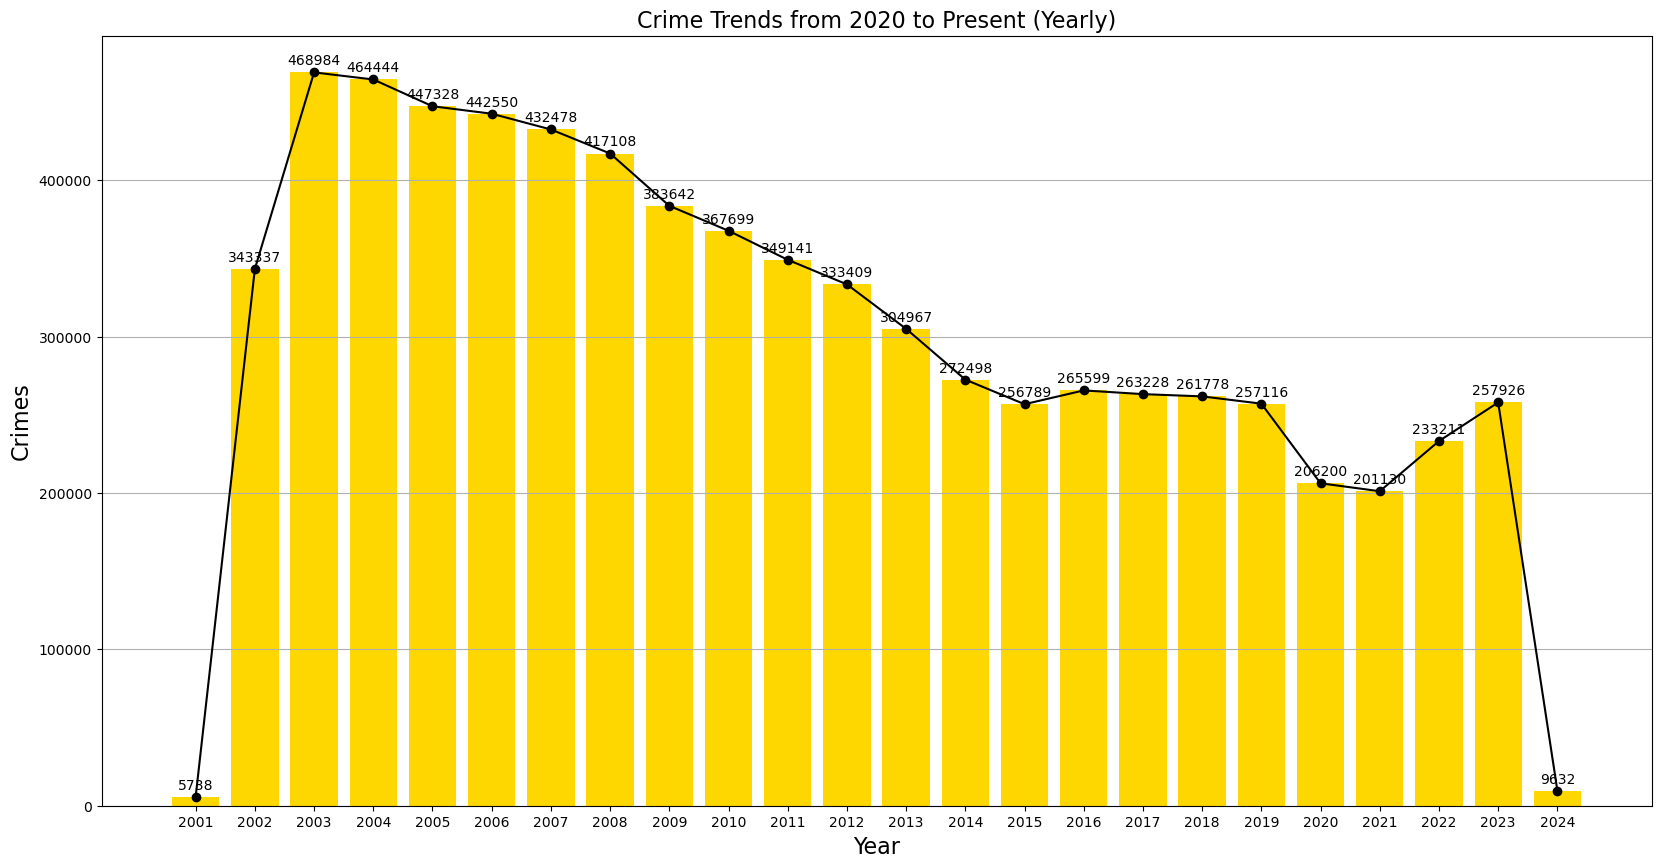

In [28]:
yearly_crime_counts = crime_data.groupby('Year').size().reset_index(name='Crime Counts')

plt.figure(figsize=(20, 10))
bars = plt.bar(yearly_crime_counts['Year'], yearly_crime_counts['Crime Counts'], color = 'Gold')

plt.plot(yearly_crime_counts['Year'], yearly_crime_counts['Crime Counts'], color='black', marker='o')

for x, y in zip(yearly_crime_counts['Year'], yearly_crime_counts['Crime Counts']):
    plt.text(x, y + 0.01 * 300000, f'{y}', ha='center', va='bottom')

plt.title('Crime Trends from 2020 to Present (Yearly)', fontsize = 16)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Crimes', fontsize = 16)
plt.grid(axis='y')
plt.xticks(yearly_crime_counts['Year'])
plt.show()


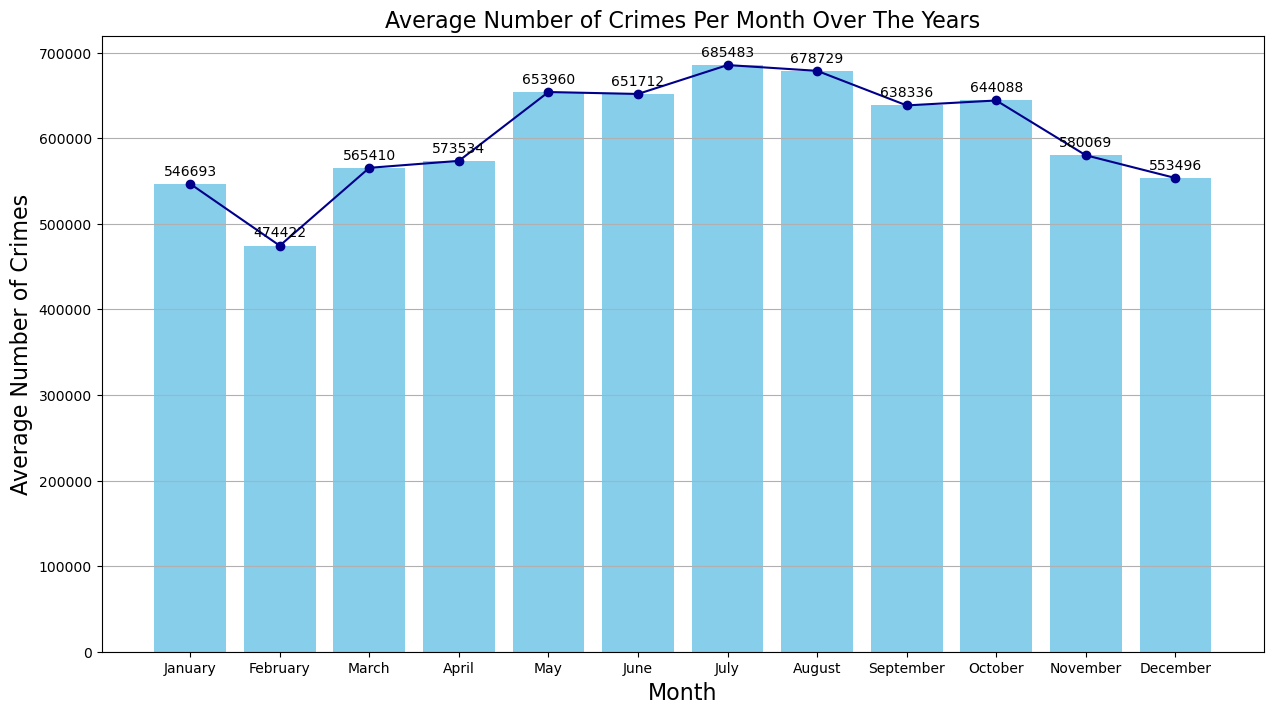

In [49]:
crime_data['Month Name'] = crime_data['Month'].apply(lambda x: calendar.month_name[x])

monthly_crime_counts = crime_data.groupby('Month Name').size().reset_index(name='Crime Counts')

monthly_crime_counts['Month Name'] = pd.Categorical(monthly_crime_counts['Month Name'], categories=calendar.month_name[1:], ordered=True)
monthly_crime_counts = monthly_crime_counts.sort_values('Month Name')

plt.figure(figsize=(15, 8))
bars = plt.bar(monthly_crime_counts['Month Name'], monthly_crime_counts['Crime Counts'], color='skyblue')

plt.plot(monthly_crime_counts['Month Name'], monthly_crime_counts['Crime Counts'], color='darkblue', marker='o')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + max(monthly_crime_counts['Crime Counts']) * 0.01, round(yval, 1), ha='center', va='bottom')

plt.title('Average Number of Crimes Per Month Over The Years', fontsize=16)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Average Number of Crimes', fontsize=16)
plt.grid(axis='y')
plt.show()

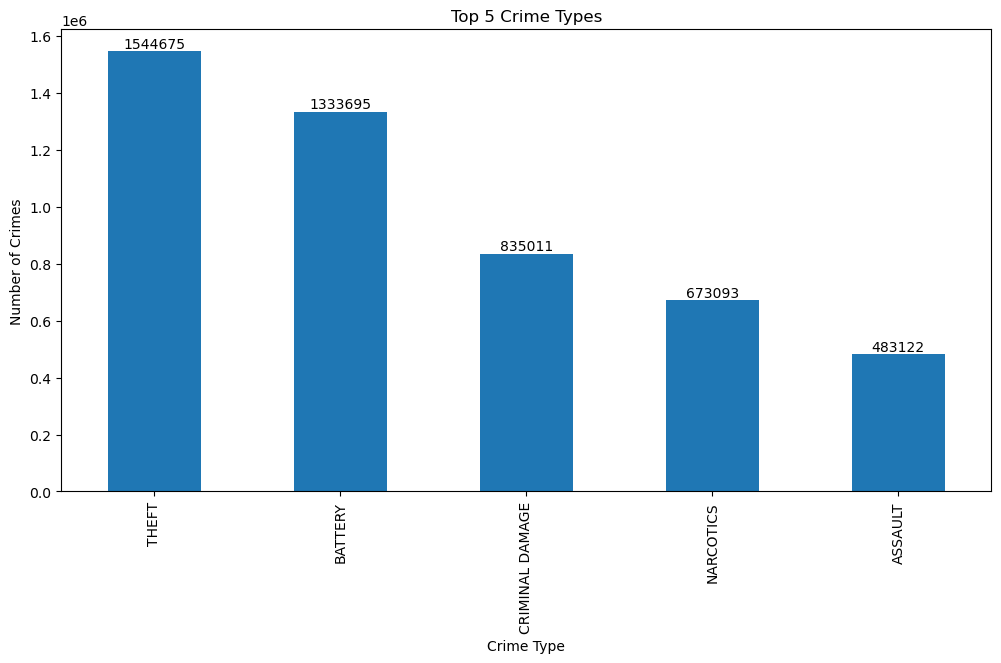

In [30]:
plt.figure(figsize=(12, 6))

bars = crime_data['Primary Type'].value_counts().head(5).plot(kind='bar', title='Top 5 Crime Types')

plt.xlabel('Crime Type')
plt.ylabel('Number of Crimes')

for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), int(bar.get_height()), 
             ha='center', va='bottom')
plt.show()

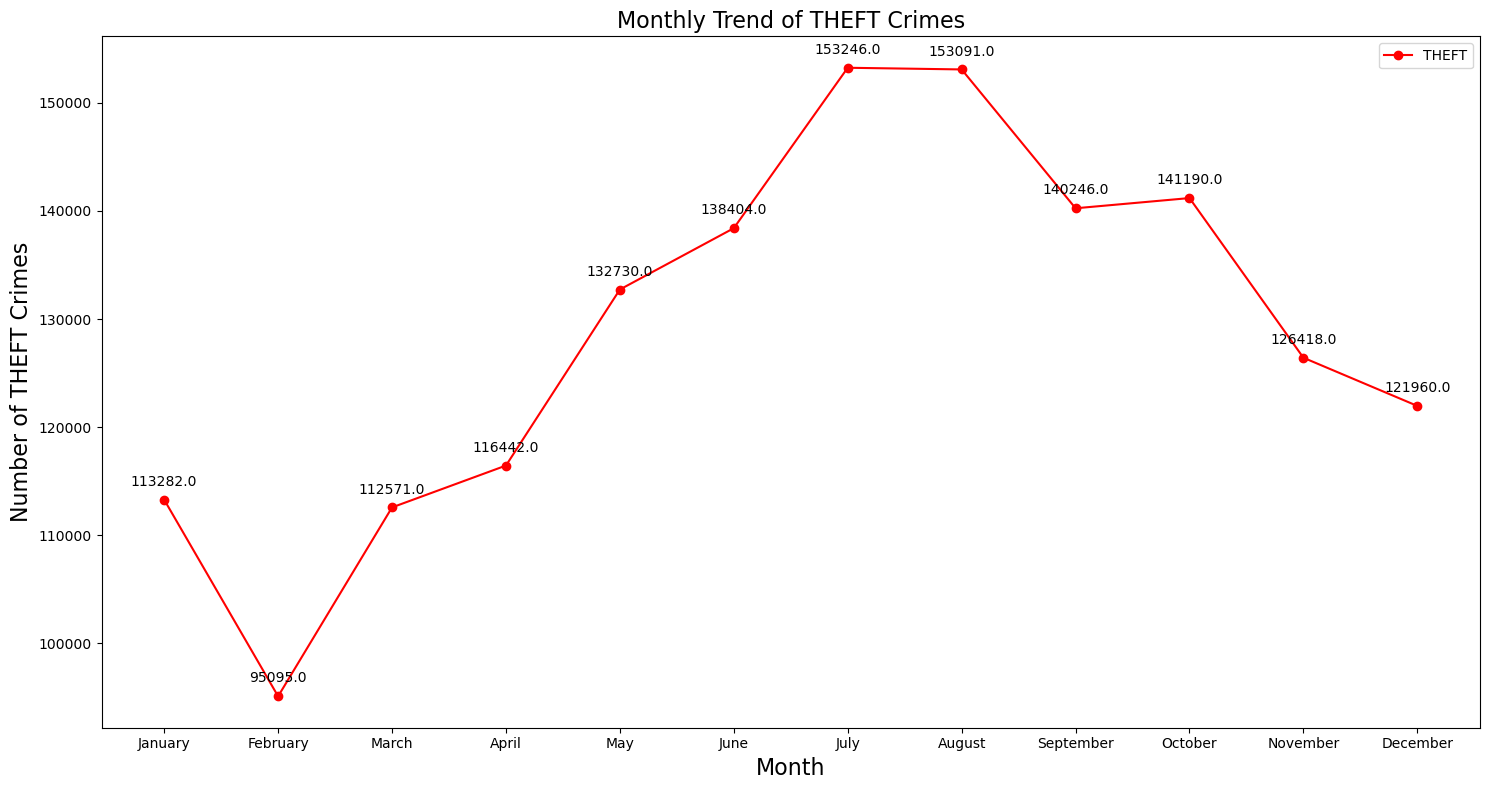

In [56]:
theft_data = crime_data[crime_data['Primary Type'] == 'THEFT']

theft_monthly_counts = theft_data.groupby(['Year', 'Month Name']).size().reset_index(name='Crime Counts')

theft_monthly_counts_pivot = theft_monthly_counts.pivot(index='Year', columns='Month Name', values='Crime Counts')

theft_monthly_trend = theft_monthly_counts_pivot.sum(axis=0)

theft_monthly_trend = theft_monthly_trend.reindex(calendar.month_name[1:])

plt.figure(figsize=(15, 8))
ax = plt.gca()

ax.plot(theft_monthly_trend.index, theft_monthly_trend.values, marker='o', color='red', label='THEFT')

for i, txt in enumerate(theft_monthly_trend.values):
    ax.annotate(txt, (theft_monthly_trend.index[i], theft_monthly_trend.values[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Monthly Trend of THEFT Crimes', fontsize=16)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Number of THEFT Crimes', fontsize=16)

plt.legend()
plt.tight_layout()
plt.show()


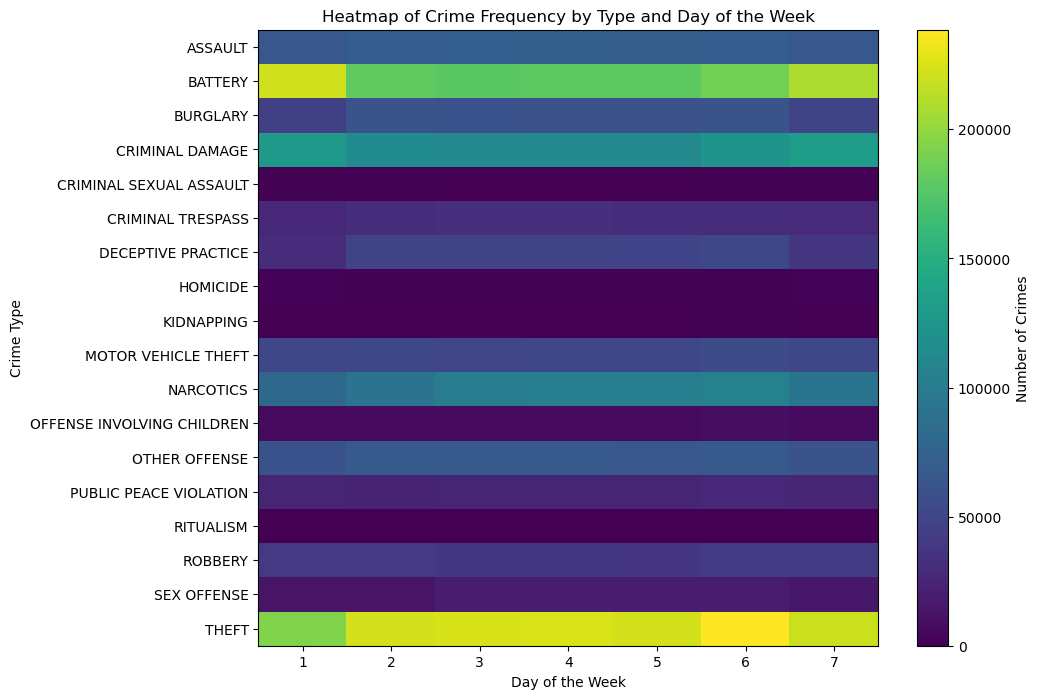

In [106]:
crime_type_day = crime_data.groupby(['Primary Type', 'Day']).size().unstack(fill_value=0)

data_for_heatmap = crime_type_day.values

plt.figure(figsize=(10, 8))
plt.imshow(data_for_heatmap, cmap='viridis', aspect='auto')
plt.colorbar(label='Number of Crimes')

plt.xticks(np.arange(len(crime_type_day.columns)), crime_type_day.columns)
plt.yticks(np.arange(len(crime_type_day.index)), crime_type_day.index)

plt.xlabel('Day of the Week')
plt.ylabel('Crime Type')
plt.title('Heatmap of Crime Frequency by Type and Day of the Week')

plt.show()

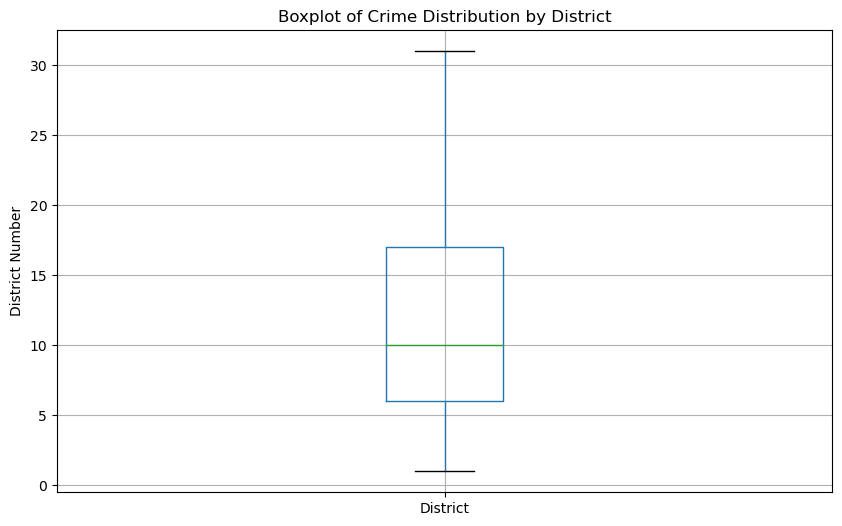

In [101]:
plt.figure(figsize=(10, 6))
crime_data.boxplot(column='District')

plt.title('Boxplot of Crime Distribution by District')
plt.ylabel('District Number')

plt.show()

In [31]:
# Find the district with the highest number of crimes
most_crime_district = crime_data['District'].value_counts().idxmax()
total_crimes_in_most_crime_district = crime_data['District'].value_counts().max()

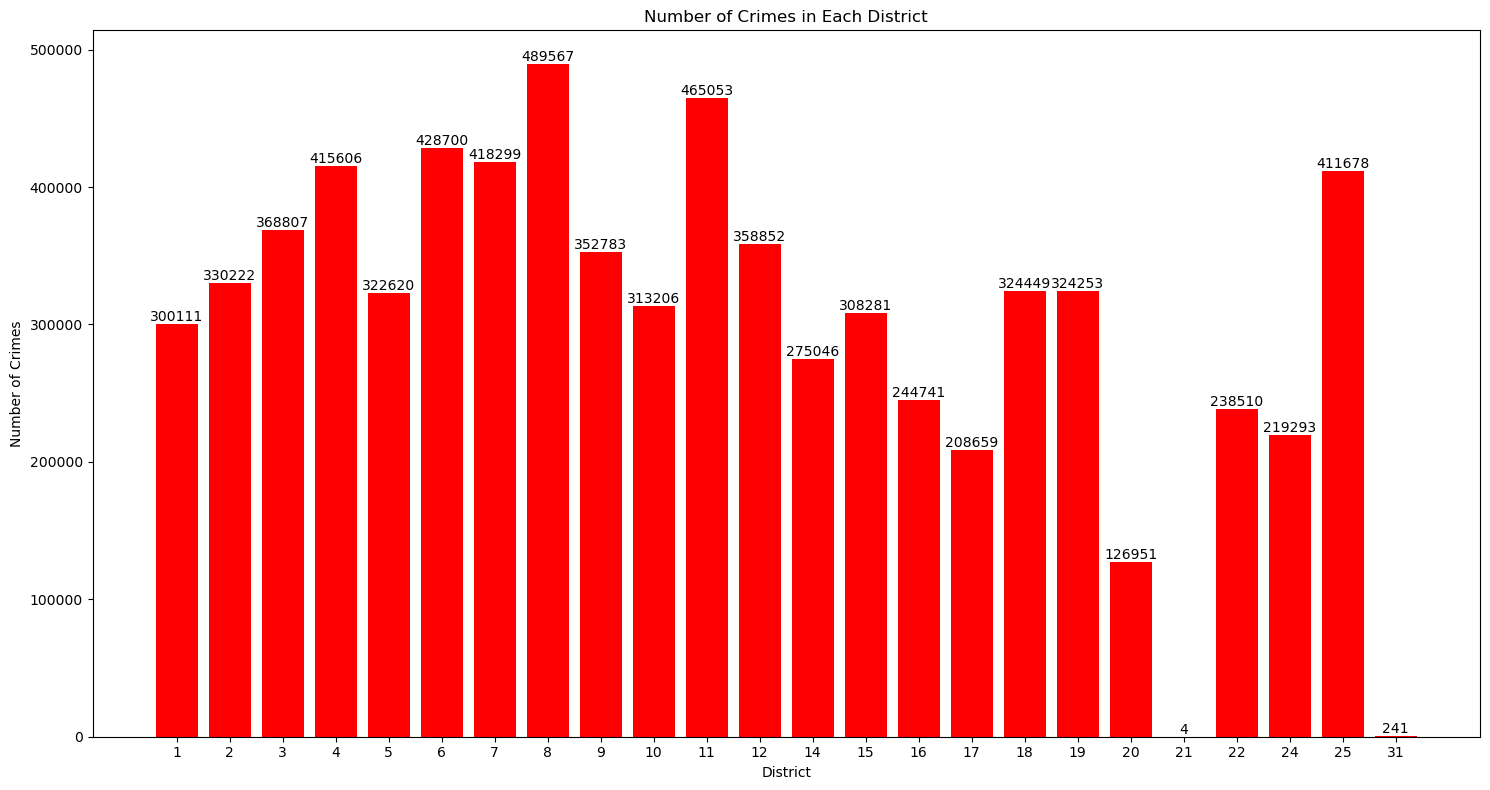

In [66]:
district_crime_counts = crime_data['District'].value_counts().sort_index()

plt.figure(figsize=(15, 8))
bars = plt.bar(district_crime_counts.index.astype(str), district_crime_counts.values, color='red')

# Add values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

plt.title('Number of Crimes in Each District')
plt.xlabel('District')
plt.ylabel('Number of Crimes')
plt.tight_layout()
plt.show()

In [33]:
print(f"The district with the most number of crimes is: {most_crime_district}, with a total of {total_crimes_in_most_crime_district} crimes.")

The district with the most number of crimes is: 8, with a total of 489567 crimes.


In [34]:
# Filter the data for the district with the most crimes
district_data = crime_data[crime_data['District'] == most_crime_district]

In [35]:
# Calculate the number of crimes in each community area within that district
community_crime_counts = district_data['Community Area'].value_counts().sort_index()

In [36]:
# Find the community area with the highest number of crimes within that district
most_crime_community_area = community_crime_counts.idxmax()
print(f"Within District {most_crime_district}, the community area with the most number of crimes is: {most_crime_community_area}")

Within District 8, the community area with the most number of crimes is: 66


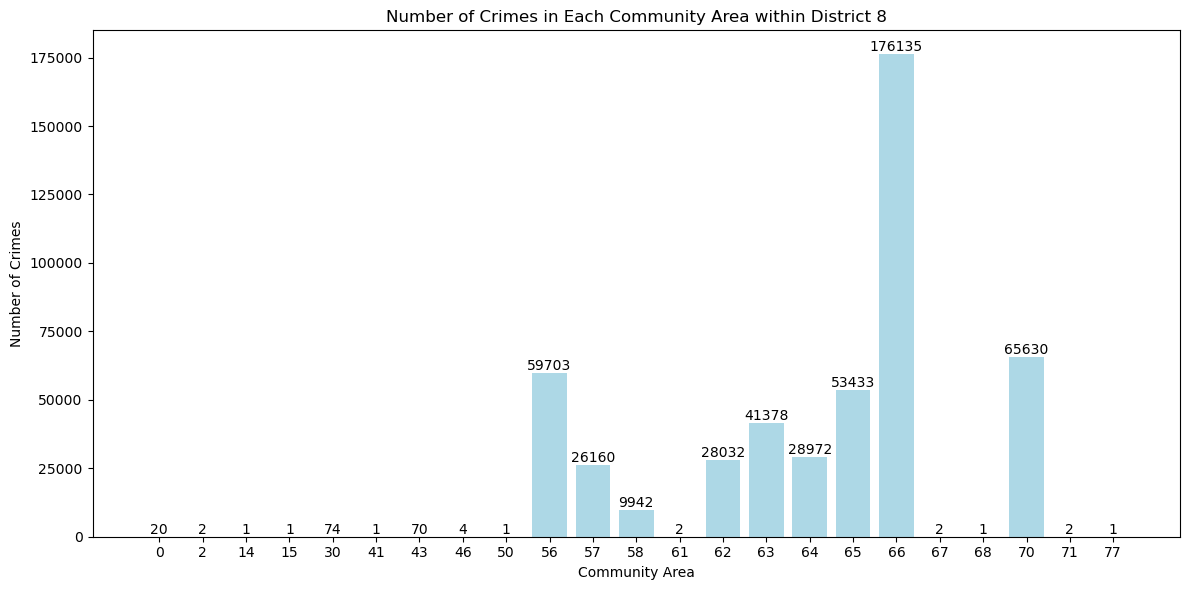

In [69]:
plt.figure(figsize=(12, 6))
bars = plt.bar(community_crime_counts.index.astype(str), community_crime_counts.values, color='lightblue')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')

plt.title(f'Number of Crimes in Each Community Area within District {most_crime_district}')
plt.xlabel('Community Area')
plt.ylabel('Number of Crimes')
plt.tight_layout()
plt.show()

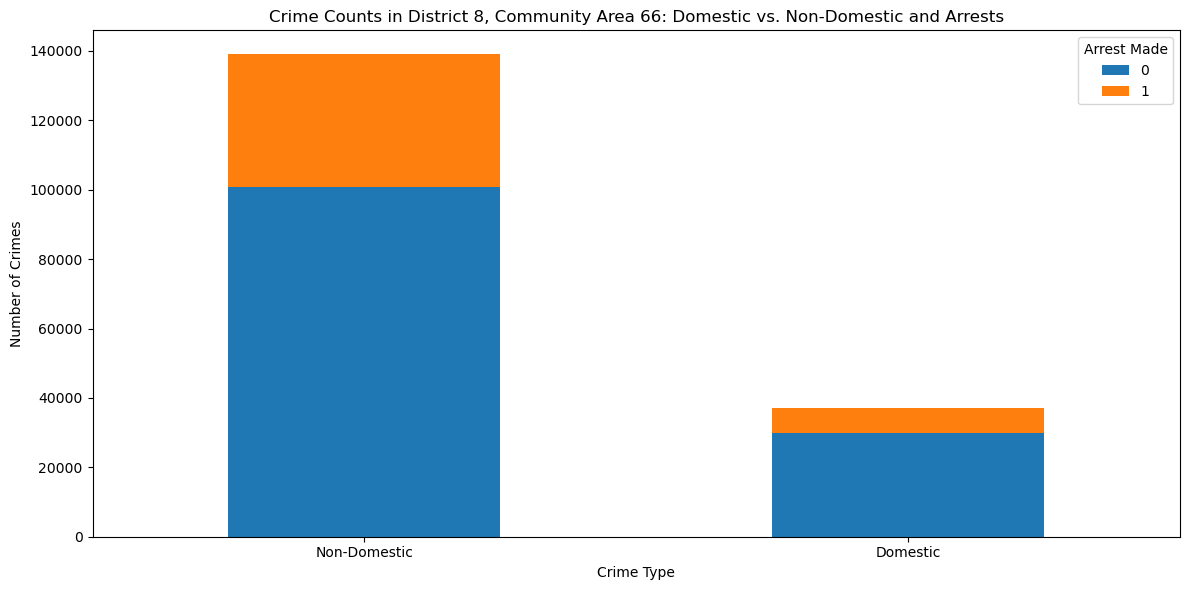

In [39]:
# Filter data for District 8 and Community Area 66
district_8_area_66_data = crime_data[(crime_data['District'] == 8) & (crime_data['Community Area'] == 66)]

# Count the number of domestic and non-domestic crimes, and arrests and non-arrests
domestic_arrest_counts = district_8_area_66_data.groupby(['Domestic', 'Arrest']).size().unstack()

# Create a bar chart
domestic_arrest_counts.plot(kind='bar', figsize=(12, 6), stacked=True)

plt.title('Crime Counts in District 8, Community Area 66: Domestic vs. Non-Domestic and Arrests')
plt.xlabel('Crime Type')
plt.ylabel('Number of Crimes')
plt.xticks(ticks=[False, True], labels=['Non-Domestic', 'Domestic'], rotation=0)  # Adjust x-ticks to show labels
plt.legend(title='Arrest Made')
plt.tight_layout()
plt.show()

In [40]:
# Find the most common crime type in District 8, Community Area 66
max_crime_type_area_66 = district_8_area_66_data['Primary Type'].value_counts().idxmax()

print(f"The most common crime type in District 8, Community Area 66 is: {max_crime_type_area_66}")

The most common crime type in District 8, Community Area 66 is: BATTERY


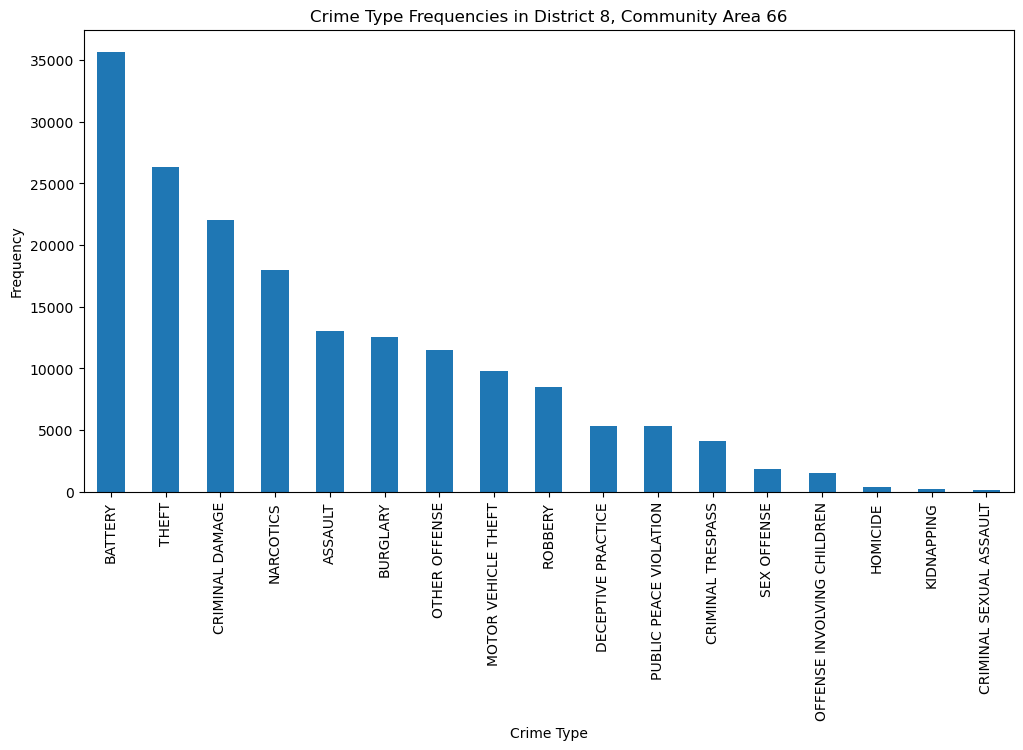

In [41]:
# Filter data for District 8 and Community Area 66
district_8_area_66_data = crime_data[(crime_data['District'] == 8) & (crime_data['Community Area'] == 66)]

# Count the frequency of each crime type
crime_type_counts = district_8_area_66_data['Primary Type'].value_counts()

# Create a bar chart
plt.figure(figsize=(12, 6))
crime_type_counts.plot(kind='bar')

plt.title('Crime Type Frequencies in District 8, Community Area 66')
plt.xlabel('Crime Type')
plt.ylabel('Frequency')
plt.show()

In [70]:
# Calculate the total number of crimes in District 8, Community Area 66
total_crimes = district_8_area_66_data.shape[0]

# Count the number of occurrences of each crime type
crime_type_counts = district_8_area_66_data['Primary Type'].value_counts()

# Calculate the probability of each crime type
crime_type_probabilities = crime_type_counts / total_crimes

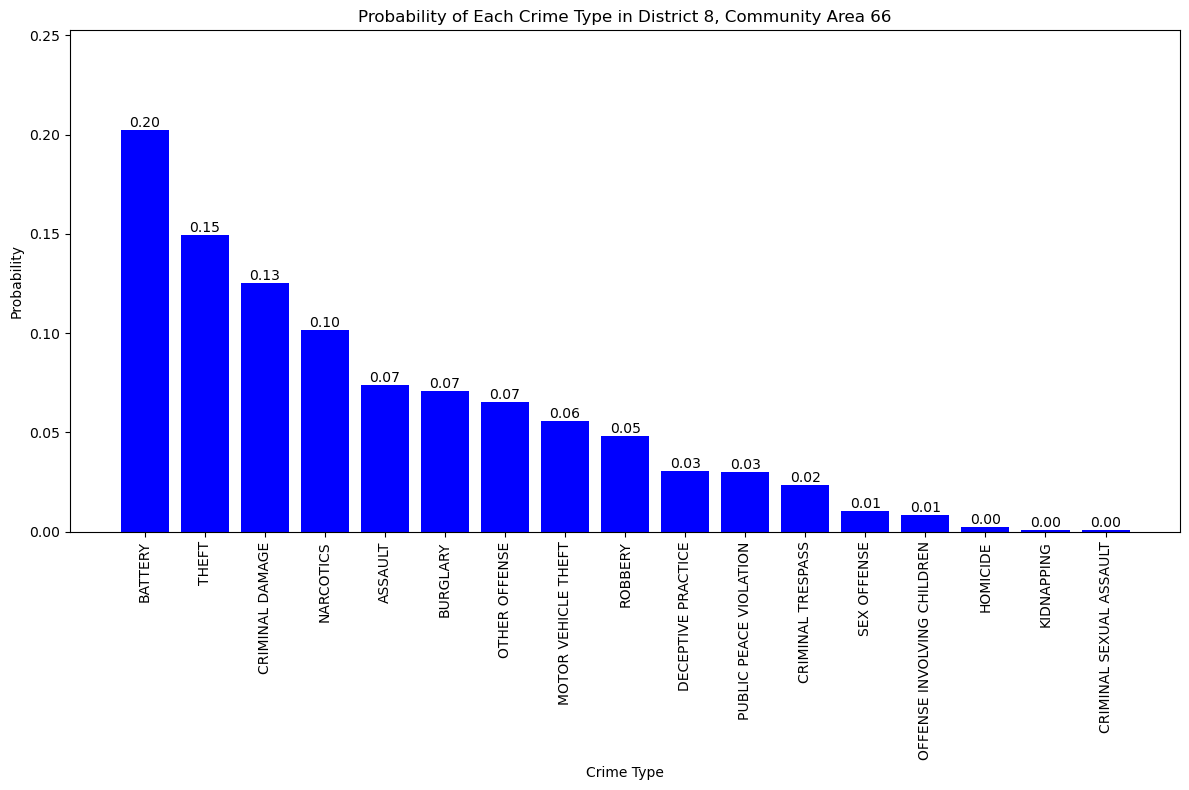

In [74]:
# Create a bar chart for the probability of each crime type
plt.figure(figsize=(12, 8))
bars = plt.bar(crime_type_probabilities.index, crime_type_probabilities.values, color='blue')

# Add values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.title('Probability of Each Crime Type in District 8, Community Area 66')
plt.xlabel('Crime Type')
plt.ylabel('Probability')
plt.xticks(rotation=90)
plt.ylim(0, crime_type_probabilities.max() + 0.05)  # Set y limit slightly higher for better visibility

plt.tight_layout()
plt.show()

In [77]:
# Filter data for District 8
district_8_data = crime_data[crime_data['District'] == 8]

# Further filter data for Community Area 66 within District 8
area_66_data = district_8_data[district_8_data['Community Area'] == 66]

In [79]:
# Calculate probability of arrest for non-domestic crimes
total_non_domestic = area_66_data[area_66_data['Domestic'] == 0].shape[0]
arrests_non_domestic = area_66_data[(area_66_data['Domestic'] == 0) & (area_66_data['Arrest'] == 1)].shape[0]
prob_arrest_non_domestic = arrests_non_domestic / total_non_domestic if total_non_domestic > 0 else 0

# Calculate probability of arrest for domestic crimes
total_domestic = area_66_data[area_66_data['Domestic'] == 1].shape[0]
arrests_domestic = area_66_data[(area_66_data['Domestic'] == 1) & (area_66_data['Arrest'] == 1)].shape[0]
prob_arrest_domestic = arrests_domestic / total_domestic if total_domestic > 0 else 0

print(f"Probability of arrest for non-domestic crimes in District 8, Community Area 66: {prob_arrest_non_domestic}")
print(f"Probability of arrest for domestic crimes in District 8, Community Area 66: {prob_arrest_domestic}")

Probability of arrest for non-domestic crimes in District 8, Community Area 66: 0.27501564714430626
Probability of arrest for domestic crimes in District 8, Community Area 66: 0.19713454702143704


In [81]:
total_non_domestic_all = crime_data[crime_data['Domestic'] == 0].shape[0]
arrests_non_domestic_all = crime_data[(crime_data['Domestic'] == 0) & (crime_data['Arrest'] == 1)].shape[0]
prob_arrest_non_domestic_all = arrests_non_domestic_all / total_non_domestic_all if total_non_domestic_all > 0 else 0

total_domestic_all = crime_data[crime_data['Domestic'] == 1].shape[0]
arrests_domestic_all = crime_data[(crime_data['Domestic'] == 1) & (crime_data['Arrest'] == 1)].shape[0]
prob_arrest_domestic_all = arrests_domestic_all / total_domestic_all if total_domestic_all > 0 else 0

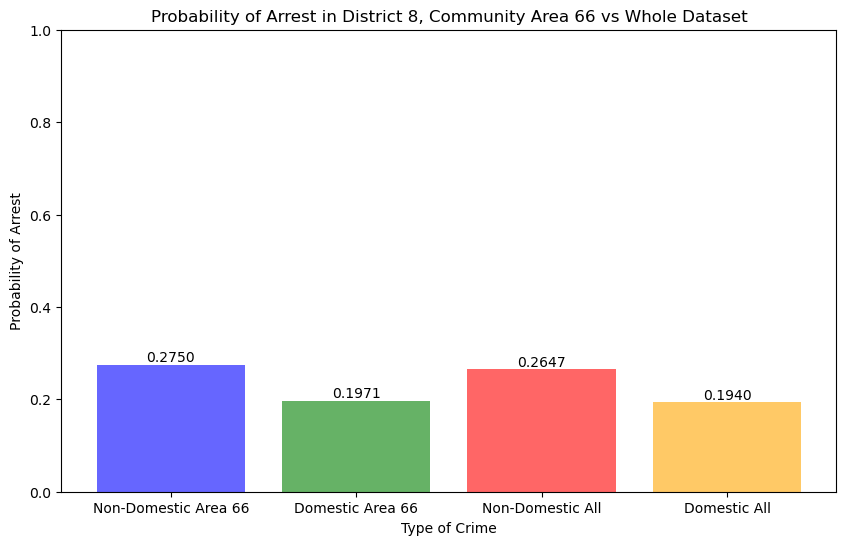

In [87]:
labels_66 = ['Non-Domestic Area 66', 'Domestic Area 66']
probabilities_66 = [prob_arrest_non_domestic, prob_arrest_domestic]

plt.figure(figsize=(10, 6))
bars_66 = plt.bar(labels_66, probabilities_66, color=['blue', 'green'], alpha=0.6)
plt.xlabel('Type of Crime')
plt.ylabel('Probability of Arrest')
plt.title('Probability of Arrest in District 8, Community Area 66 vs Whole Dataset')

for i, prob in enumerate(probabilities_66):
    plt.text(i, prob, f'{prob:.4f}', ha='center', va='bottom')

labels_all = ['Non-Domestic All', 'Domestic All']
probabilities_all = [prob_arrest_non_domestic_all, prob_arrest_domestic_all]

bars_all = plt.bar(labels_all, probabilities_all, color=['red', 'orange'], alpha=0.6)

for i, prob in enumerate(probabilities_all):
    plt.text(i + 2, prob, f'{prob:.4f}', ha='center', va='bottom')

plt.ylim(0, 1)
plt.show()